# Characteristics of Bike riders who ride  three kinds of bikes

## By Ibukun Irinyenikan

## Investigation Overview

In this investigation, I wanted to look at the distance travelled by bike riders,
time spent during those rides and how they relate to both groups of bike riders 
and the kind of bikes they ride.
The two groups of bike riders are represented as casual and member. While the types of bikes are Electric Bike, Classic Bike and Docked Bike.
I also investigated how the categorical variables relate to the dependent variables(Distance and duration). I will show how the riders ride in relative to each month of the year, days of the week and periods of the day. 

## Dataset Overview

The data consists information regarding the characteristics of bike riders in the entire year of 2021.
The dependent variables include the duration and distance discovered on trips.
Categorical variables that will be explored incude how the riders ride in relative to 
each month of the year, days of the week and periods of the day. 

A 400,000 sample of the cleaned dataset were also collected and stored into a variable named bike_sample. The bike_sample was created to reduce overplotting of data points on scatterplot.

In [1]:
# Import necessary packages and set plots to be embedded inline

import pandas as pd
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import h3
import time

In [2]:
# load in the cleaned dataset into a  pandas dataframe

bike = pd.read_csv("bike.csv")

In [3]:
# Convert date columns to datetime datatype.

bike["started_at"]  = pd.to_datetime(bike["started_at"])
bike["ended_at"]  = pd.to_datetime(bike["ended_at"])

# Convert to timedelta datatype.

bike["duration"] = pd.to_timedelta(bike["duration"])

In [4]:
# Take a 400,000 sample of records from bike dataframe 
# to reduce overplotting on scatterplot

bike_sample  = bike.sample(400000)

## Distribution of Time Spent on Rides

The histogram is unimodal and skewed to the right. This implies more bike riders spent lesser time in their rides than those who spent more time. Only few riders spent above 30 minutes on their rides when compared to the volume of the dataset.

The bars increases progressively from 1 minute until it gets to 6 to 8 minutes. Many bike riders spent 6 to 8 minutes  on their rides. About 300,000 bike riders spent 6 to 8 minutes on their rides. The highest amount of rides for a particular minutes.

When the volume of the entire population is taken into consideration, only a few riders spent over 20 minutes on their rides. The highest duration spent by any rider is around 43 minutes.

<Figure size 576x360 with 0 Axes>

<Figure size 576x504 with 0 Axes>

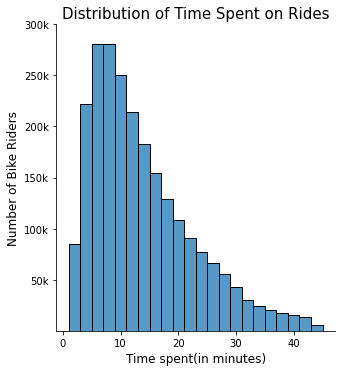

In [5]:
# An histogram showing the distribution of the duration of trips in minutes.

yticks = [5e4, 1e5, 1.5e5, 2e5, 2.5e5, 3e5]
ytick_label = ["50k", "100k", "150k", "200k", "250k", "300k"]
plt.figure(figsize=(8,5))
bins = np.arange(1, bike.time_spent.max()+2, 2)

plt.figure(figsize=(8,7))
sb.displot(data=bike, x="time_spent",  bins=bins,kde=False)
plt.title("Distribution of Time Spent on Rides", fontsize=15)
plt.xlabel("Time spent(in minutes)", fontsize=12)
plt.ylabel("Number of Bike Riders", fontsize=12)
plt.yticks(yticks, ytick_label)
plt.show()

## Distribution of Distance covered by bike riders.


After I took a log transformation of the frequency axis of the distribution 
of distance travelled, The information of the resulting distribution was similar to
the one without log transformation. It shows a negative correlation with the number of riders. 
The higher the distance bike riders covered the lesser the number of the riders covering the distance.

The number of riders increased significatly until the distance is around 2.5 kilometer and then began to fall afterwards. 
It means that most of the riders didn't ride beyond 2.5 kilometer. By statistic, I found that 1.7 million bike riders ride 2.5 kilometer and below. Only about 632,000 riders ride above 2.5 km.

<Figure size 720x576 with 0 Axes>

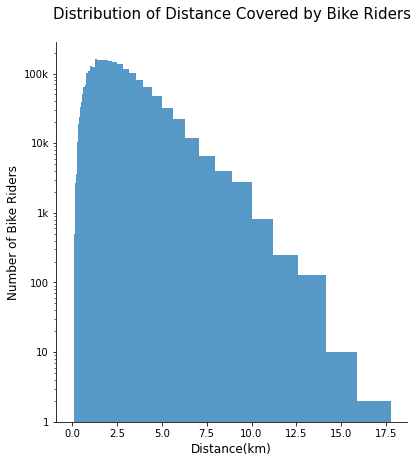

In [6]:
# The distribution of distance after cleaning was done. I will put it on a log scale.

binsize = 0.05

yticks = [1, 10, 100, 1e3, 1e4, 1e5]
ytick_label = ["1", "10", "100", "1k", "10k", "100k"]
bins = 10 ** np.arange(-3, np.log10(bike.distance).max()+binsize, binsize)

plt.figure(figsize=(10,8))
sb.displot(data= bike, x= "distance", bins=bins, height=6)
plt.title("Distribution of Distance Covered by Bike Riders\n", fontsize=15)
plt.yscale("log")
plt.xlabel("Distance(km)", fontsize=12)
plt.ylabel("Number of Bike Riders", fontsize=12)
plt.yticks(yticks, ytick_label)
plt.show()

## Does the Time Spent on Rides Depends On the Distance Covered By the Bike?
#### (Distance vs Duration)

The line of fit seem to implies the distance increases with duration . The correlation is not too strong though. but It appears a positive correlation. I plot the cube root transformation of the x-axis on the chart below the first one.

After taking the cube root transformation of the duration axis in the second chart. The scatter plot shows similar relationship between the  distance and duration.  An increase in the distance shows an increase in the duration though not a very strong correlation.

As bike riders cover higher distance, we might expect them to spend more minutes. Although not in all cases.


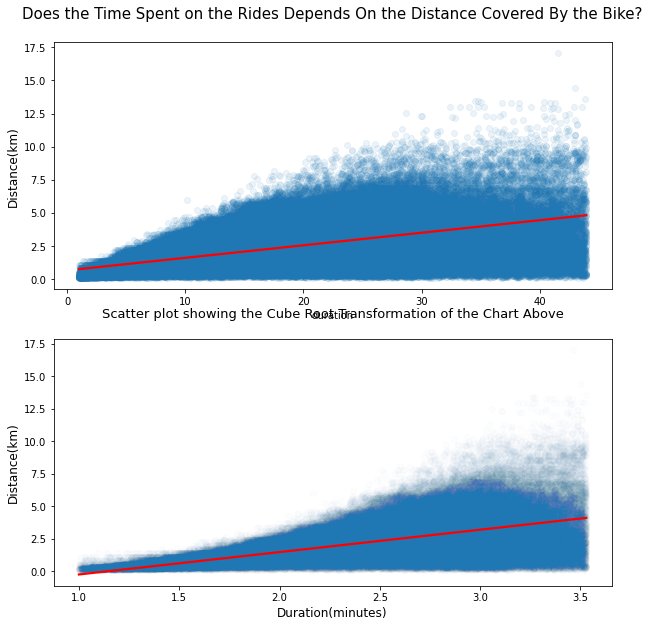

In [7]:
# Scatter plot showing the relationship betweeen distance covered by trips and total minutes spent in the trip.

# A sample of 100,000 data records.
bike_sample = bike.sample(400000)

# Distance sample.
distance_sample = bike.distance.sample(400000)

# Duration sample in minutes.
minute_sample = bike_sample.duration.dt.total_seconds() /60

# Scatter plot showing the relationship betweeen distance covered by trips and total minutes spent in the trip.

fig, ax = plt.subplots(nrows=2, figsize=(10,10))

sb.regplot(data=bike_sample, x=minute_sample, y="distance", fit_reg=True, scatter_kws={"alpha":0.08}, line_kws={"color":"red"}, ax=ax[0])

#  cube root transformation of x- axis in  scatter plot showing the relationship 
# betweeen distance covered by trips and total minutes spent in the trip.
minute_sample_cbrt = np.cbrt(minute_sample)
sb.regplot(data=bike_sample, x=minute_sample_cbrt, y="distance", fit_reg=True, scatter_kws={"alpha":0.01}, line_kws={"color":"red"}, ax=ax[1])

ax[0].set_title("Does the Time Spent on the Rides Depends On the Distance Covered By the Bike?\n", fontsize=15)
ax[1].set_title("Scatter plot showing the Cube Root Transformation of the Chart Above\n", fontsize=13)
ax[0].set_ylabel("Distance(km)", fontsize=12)
ax[1].set_xlabel("Duration(minutes)", fontsize=12)
ax[1].set_ylabel("Distance(km)", fontsize=12)
plt.show()

## The Correlation of Distance with Time Spent on Rides By Both Riders Group And The Kind of Bikes They Ride

Both groups of bike riders together with the kind of bike they ride shows similar relationship with one another.
As the distance increase, the duration also weakly increases. A weak relationship nonetheless.

An exception is the last plot for suscribed member where there appears to be an empty plot. The suscribed member group who ride docked bikes has only one value. This was discovered both statically and visually in the exploration part of this project. There is only one suscribed member who ride docked bike.

This suggest that suscribed members are not a fan of docked bikes.



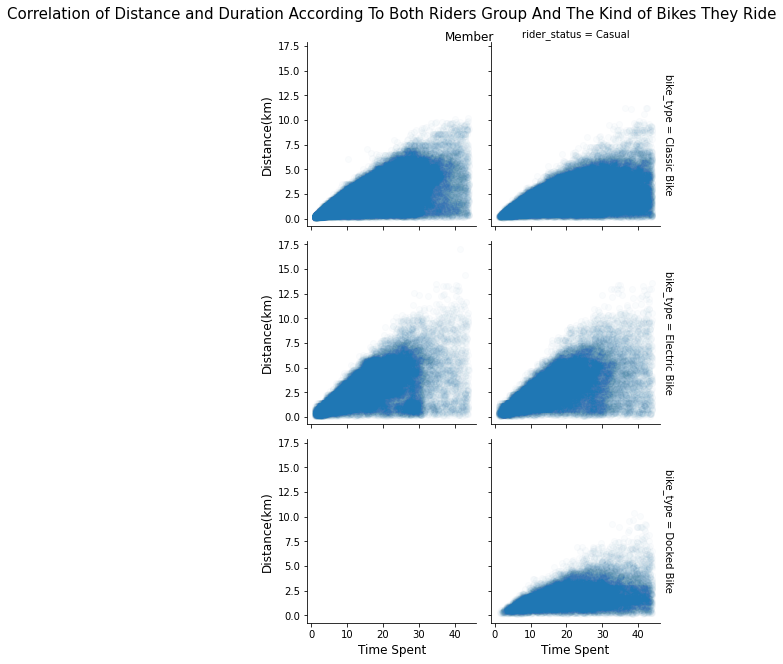

In [8]:
# Scatter plot showing the correlation of distance and duration grouped by the bike_type and rider_status.

g = sb.FacetGrid(data=bike_sample, col="rider_status", row="bike_type", margin_titles=True)
g.map(sb.regplot, "time_spent", "distance", fit_reg=False, scatter_kws={"alpha":0.02}, line_kws={"color":"red"})
axes = g.axes.flatten()
axes[0].set_title("Correlation of Distance and Duration According To Both Riders Group And The Kind of Bikes They Ride\n", fontsize=15)

g.fig.suptitle("Member")
for ax in axes:
    ax.set_xlabel("Time Spent", fontsize=12)
    ax.set_ylabel("Distance(km)", fontsize=12)

plt.show()

## Distance covered and time spent by both groups of bike riders and the kind of bikes they ride

As visualised in the box plot, the median of the distance covered  by the casual rider is slightly higher than that of suscribed member counterpart. Expectedly, the median time spent by the casual riders is significantly higher than that of  their suscribed member counterpart.

This confirms the previous findings that the time spent on trips tend to sometimes increase as the distance covered increase.

Electric bikes covered more distance than any other bike. This is obvious as the median of the distance is higher than that of classic bikes and docked bikes.

Docked bikes riders spent the most minutes on their rides than both electric and classic bike  riders yet they docked bike riders cover lesser more distance than electric bike. One would have expected that docked bike riders to spend lesser minutes on their rides than electric bike riders because they cover lesser distance. This confirms that the correlation between time spent on duration is not a very strong correlation. Higher distance covered does not always mean the bike would spend more minutes. 

The speed of the bike is a big factor to determine the time spent in the ride. High speed could reduce the time taken for higher distance compared to lower distance with lower speed.

In [9]:
# This is the default color that will be used to color the charts.
# It will be used severally in this exploration.

base_color = sb.color_palette()[0]

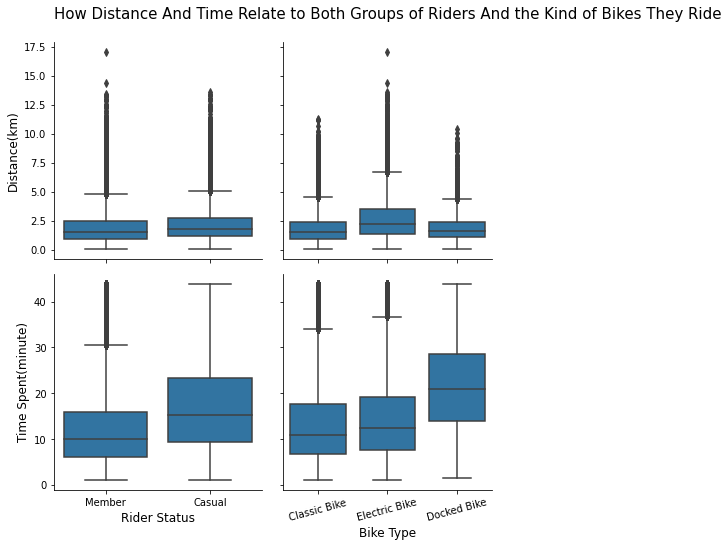

In [10]:
# Boxplot showing the statistical levels of the numerical variables with the categorical variables.


g = sb.PairGrid(data=bike_sample, y_vars=["distance", "time_spent" ], x_vars= ["rider_status", "bike_type"], height=3.5)
g.map(sb.boxplot, color=base_color)

plt.xticks(rotation=15)


axes = g.axes.flatten()
axes[1].set_title("How Distance And Time Relate to Both Groups of Riders And the Kind of Bikes They Ride\n", fontsize=15)
axes[0].set_ylabel("Distance(km)", fontsize=12)
axes[2].set_ylabel("Time Spent(minute)", fontsize=12)
axes[2].set_xlabel("Rider Status", fontsize=12)
axes[3].set_xlabel("Bike Type", fontsize=12)

plt.show()

In [11]:
# Total number of rows.

n_bike = bike.shape[0]

In [12]:
# A Function finding the proportion of the data with the maximum value in a column.

def proportion(dataframe,column):
    """Find the proportion of the data with the maximum occurence in a column."""
    
    return column.value_counts()[0] / dataframe.shape[0]

In [24]:
# Functions to add title and labels to chart.

def polish_chart(plt, title, xlabel, ylabel):
    """ Adds title and labels to chart. """
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel,fontsize=12)
    plt.ylabel(ylabel,fontsize=12)
       

## Percentage of Bike Riders Who Ride the Three kinds of Bikes

I found that classic bikes are the most preferred bikes among bike riders. They are the most popular bikes. 76 percent of bike riders ride classic bikes.
While docked bikes are the least popular bikes among bike riders. Only about 5 percent of the riders ride docked bike while around 19 percent of the riders ride electric bikes.
This implies that most of the riders ride classic bikes and they ride docked bikes the least.


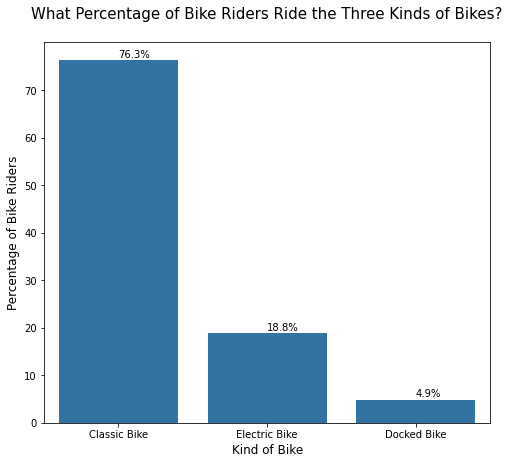

In [26]:
# Call the proportion function.
max_bike_type_prop = proportion(bike, bike["bike_type"])
max_bike_type_prop

bike_type_count = bike.bike_type.value_counts()

# Tick names.
ticks = np.round(np.arange(0, max_bike_type_prop, 0.1), 2)
tick_name = (ticks * 100).astype("int")

# ytick location.
yticks = n_bike * ticks

plt.figure(figsize=(8,7))

# Bar chart showing the popularity of bike types among bike riders.
bike_type_bar = sb.countplot(data=bike, x="bike_type", color=base_color)

plt.yticks(yticks, tick_name)

for i in range(len(bike_type_count)):
    count = bike_type_count[i]
    label = "{:0.1f}%".format(100 * count/n_bike)
    plt.text(i, count+3e4,  label, va="center")


# Call function to add label and titles chart.
polish_chart(plt, 
             "What Percentage of Bike Riders Ride the Three Kinds of Bikes?\n",
             "Kind of Bike",
             "Percentage of Bike Riders"
            )
plt.show()

## How Much Both Groups of Riders Ride in Each Months of the Year

The bar chart shows that the casual riders had the highest number of rides in the month of july. They also had the least number of rides in the month of February.
The suscribed member had the highest number of rides in the month of october. Like the casual riders, they also had the least ride in february.

Since the number of suscribed member riders in the dataset is almost twice as much as the number of casual member. It's not surprising to see from this chart that suscribed members had the highest number of rides in the entire year.

The chart showed that most of the rides happened on October while the least rides were taken on February.
I include the numbers of the both groups of riders on the bar chart.

In [47]:
# Creating months and days of trips from started_at column.

month = bike.started_at.dt.month_name()
day =  bike.started_at.dt.day_name()

# Convert day to categorical data type.

order_day = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
day_cat=pd.api.types.CategoricalDtype(ordered=True, categories=order_day)
day = day.astype(day_cat)

In [15]:
# Functions to add data label to bar charts.

def add_label(chart):
    """
    Add data label to bar charts.
    
    Parameter chart(axes): 
        The axes subplot of a bar chart.
    
    Returns: 
        String, a data label added to the bar chart.
    """
    for container in chart.containers:
        ax.bar_label(container, labels= [f"{x:,.0f}" for x in container.datavalues],
                     label_type="edge")
        
        
# Functions to turn off the axes of the bar chart.

def remove_axis(chart):
    """
    Turns off the axes lines.
    
    Parameter chart(axes):
        The axes of the subplot of a bar chart.
        
    Returns:
        Clear the axes line.
    """
    chart.spines.right.set_visible(False)
    chart.spines.left.set_visible(False)
    chart.spines.top.set_visible(False)    

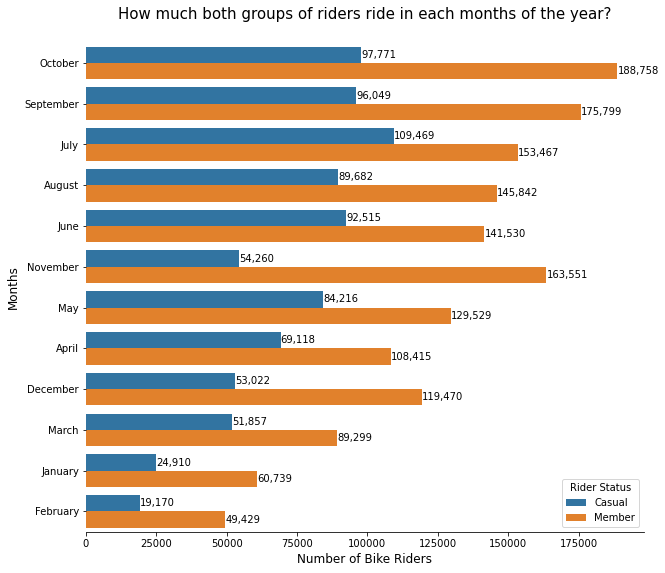

In [29]:
# Bar Chart showing how much both groups of riders ride in each months of the year

month_order = month.value_counts().index
plt.figure(figsize=(10,9))
ax = sb.countplot(data=bike, y=month,  hue="rider_status", order=month_order)
add_label(ax)

# Call function to remove axis lines.
remove_axis(ax)


# Call function to add labels and title to chart.
polish_chart(plt, 
             "How much both groups of riders ride in each months of the year?\n",
             "Number of Bike Riders",
             "Months")
plt.legend(title="Rider Status")
plt.show()

## How Both Groups of Riders Ride in Each day of the Week

The bar chart below shows that both  causal and suscribed member riders together had the highest number of rides on Saturday.
Suscribed members had the least rides on Sunday while casual riders had the least rides on Monday, Tuesday and Wednesday.

The bar chart shows that most of the rides were taken on saturday.
The number of both groups of riders as they ride on each day of the week is included on the bar chart.

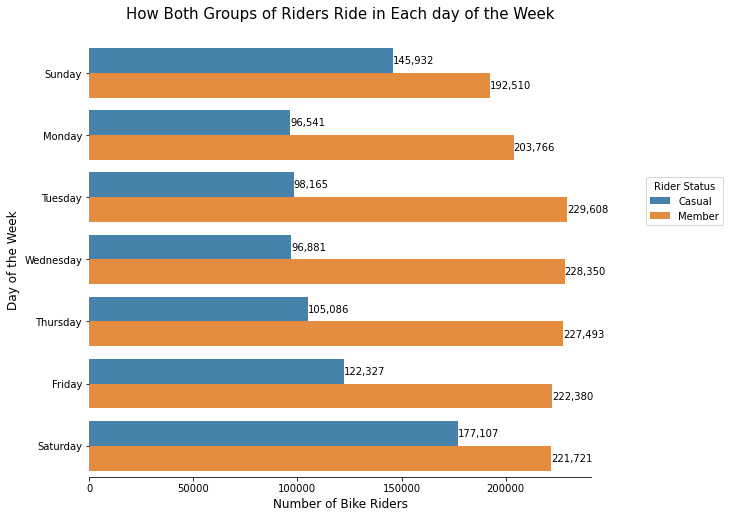

In [46]:
# Bar chart showing how both group of riders ride in each day of the week.

day_order = day.value_counts().index
plt.figure(figsize=(9,8))
ax = sb.countplot(data=bike, y=day, hue="rider_status",  alpha=0.9)

#Call function to add data labels to chart.
add_label(ax)

# Call function to remove axis lines.
remove_axis(ax)

plt.legend(title="Rider Status", bbox_to_anchor=(1.1, 0.7))

# Call function to add labels and title to chart.
polish_chart(plt, 
             "How Both Groups of Riders Ride in Each day of the Week\n",
             "Number of Bike Riders",
             "Day of the Week")
plt.show()

## How Both Group of Riders Ride in Various Periods of the Day

The bar chart below shows that the casual riders had the highest number of rides during afternoon period while they had the least rides at late night.

Suscribed members had the highest number of rides in the evening and the lowest rides at late night.

The bar chart shows that both the casual riders and suscribed riders have a similar number of turnouts at late night.

The visualisation shows that most rides happened in the evening and the riders ride least at late night.
The result at late night is not surprising because this is generally bed time period.
The number of both groups of riders as they ride at various period of the day is included on the bar chart.

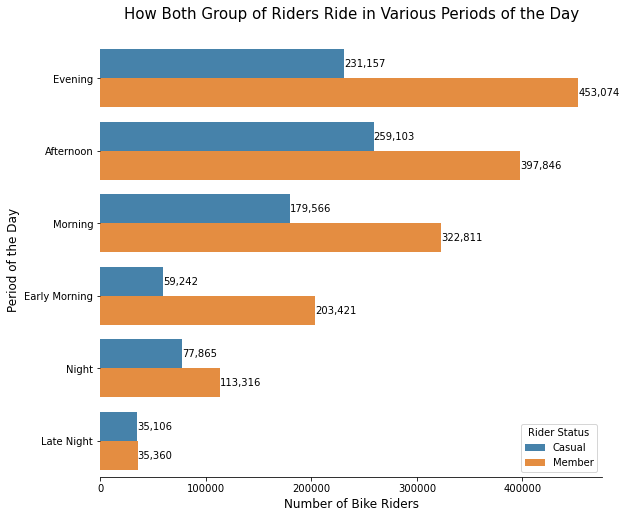

In [31]:
# I will explore how both group of riders ride in different periods of the day.

session_index = bike.session.value_counts().index
plt.figure(figsize=(9,8))
ax = sb.countplot(data=bike, y="session", hue="rider_status", order=session_index, alpha=0.9)

# Add data labels to chart.
add_label(ax)

# Remove axis line.
remove_axis(ax)


# Call function to add labels and title to chart.
polish_chart(plt, 
             "How Both Group of Riders Ride in Various Periods of the Day\n",
             "Number of Bike Riders",
             "Period of the Day")
plt.legend(title="Rider Status")
plt.show()

### Generate Slideshow
Run the command below to generate the HTML slideshow.

In [19]:
# The command below will generate the HTML slideshow.

!jupyter nbconvert Capital_BikeShare_Project_Part2.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Capital_BikeShare_Project_Part2.ipynb to slides
[NbConvertApp] Writing 607413 bytes to Capital_BikeShare_Project_Part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(n